<a href="https://colab.research.google.com/github/saurabhsangwan/music-genre-classification/blob/main/data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Mount Google Drive
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)

drive.mount(ROOT)

ModuleNotFoundError: No module named 'google'

In [ ]:
%cd drive/MyDrive/IDS/IDS

In [32]:
import pandas as pd
import numpy as np
import scipy.stats as st
import plotly.figure_factory as ff
import seaborn as sns
import warnings
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import plotly.figure_factory as ff
from sklearn.feature_selection import SelectKBest, f_classif

In [8]:
data = pd.read_csv("./data/merged_data.csv")
data.head()

,Unnamed: 0,track_id,genre,title,chroma_cens1,chroma_cens2,chroma_cens3,chroma_cens4,chroma_cens5,chroma_cens6,...,spectral_contrast6,spectral_contrast7,spectral_rolloff1,tonnetz1,tonnetz2,tonnetz3,tonnetz4,tonnetz5,tonnetz6,zcr1
0,0,135054,Experimental,Hari Karl (for Larry Eisenberg),0.310373,0.308683,0.290821,0.297749,0.287629,0.260195,...,17.265811,42.597892,2571.502445,-0.002862,-0.000695,0.004706,-0.006419,0.005246,-0.001563,0.070002
1,1,135336,Pop,Slow and Steady,0.161290,0.161296,0.190398,0.171992,0.189878,0.187176,...,20.103589,33.081974,4486.854020,-0.006867,-0.004326,-0.092237,0.019405,-0.006026,0.015697,0.085219
2,2,135337,Pop,The Dream and the Dreamer,0.443386,0.357355,0.191626,0.202726,0.284854,0.236113,...,21.580315,32.187206,4382.598041,0.024635,-0.007949,0.011779,0.130071,0.014134,0.009135,0.108170
3,3,135043,Folk,Babel,0.141946,0.153972,0.169128,0.218597,0.385648,0.400918,...,21.147088,32.537513,4162.319868,0.017150,-0.001607,-0.063755,0.005411,0.006720,-0.011991,0.074080
4,4,135091,Experimental,Tree and Wind,0.017648,0.017463,0.035690,0.158926,0.163426,0.064951,...,19.401185,34.605480,4653.557040,-0.002268,-0.042291,0.160464,-0.144974,0.053375,-0.030622,0.100463


In [9]:
data= data.drop(columns=['Unnamed: 0'])

In [10]:
data.count()

track_id        7997
genre           7997
title           7997
chroma_cens1    7997
chroma_cens2    7997
                ... 
tonnetz3        7997
tonnetz4        7997
tonnetz5        7997
tonnetz6        7997
zcr1            7997
Length: 77, dtype: int64

In [11]:
data.head()

,track_id,genre,title,chroma_cens1,chroma_cens2,chroma_cens3,chroma_cens4,chroma_cens5,chroma_cens6,chroma_cens7,...,spectral_contrast6,spectral_contrast7,spectral_rolloff1,tonnetz1,tonnetz2,tonnetz3,tonnetz4,tonnetz5,tonnetz6,zcr1
0,135054,Experimental,Hari Karl (for Larry Eisenberg),0.310373,0.308683,0.290821,0.297749,0.287629,0.260195,0.229743,...,17.265811,42.597892,2571.502445,-0.002862,-0.000695,0.004706,-0.006419,0.005246,-0.001563,0.070002
1,135336,Pop,Slow and Steady,0.161290,0.161296,0.190398,0.171992,0.189878,0.187176,0.231823,...,20.103589,33.081974,4486.854020,-0.006867,-0.004326,-0.092237,0.019405,-0.006026,0.015697,0.085219
2,135337,Pop,The Dream and the Dreamer,0.443386,0.357355,0.191626,0.202726,0.284854,0.236113,0.234724,...,21.580315,32.187206,4382.598041,0.024635,-0.007949,0.011779,0.130071,0.014134,0.009135,0.108170
3,135043,Folk,Babel,0.141946,0.153972,0.169128,0.218597,0.385648,0.400918,0.308826,...,21.147088,32.537513,4162.319868,0.017150,-0.001607,-0.063755,0.005411,0.006720,-0.011991,0.074080
4,135091,Experimental,Tree and Wind,0.017648,0.017463,0.035690,0.158926,0.163426,0.064951,0.212070,...,19.401185,34.605480,4653.557040,-0.002268,-0.042291,0.160464,-0.144974,0.053375,-0.030622,0.100463


In [12]:
#explore data
print(f'Number of variables - {data.shape[1]}\n')
print(f'Data Types for each variable - \n{data.dtypes}\n')
print(f'Number of variables for each data type - \n{data.dtypes.value_counts()}')

Number of variables - 77

Data Types for each variable - 
track_id          int64
genre            object
title            object
chroma_cens1    float64
chroma_cens2    float64
                 ...   
tonnetz3        float64
tonnetz4        float64
tonnetz5        float64
tonnetz6        float64
zcr1            float64
Length: 77, dtype: object

Number of variables for each data type - 
float64    74
object      2
int64       1
dtype: int64


In [13]:
#search missing data
#Counting Null values for each column
null_count = data.isnull().sum()
null_count = null_count[null_count>0]

#Printing null counts for columns that have null count >0
print(f'Null count for Columns - \n{null_count}\n\n')

#Printing % of null counts for columns that have null count>0
for column, null_co in null_count.iteritems():
    print(f'Percentage of missing values for Column {column} - {null_co*100/data.shape[0]:.2f} %')
    if (null_co*100/data.shape[0]) > 0:
      col = column 
      data[data.isnull().any(axis=1)][[col]]

Null count for Columns - 
Series([], dtype: int64)




In [14]:
data = data.dropna()

In [15]:
#Counting Null values for each column
null_count = data.isnull().sum()
null_count = null_count[null_count>0]
print(null_count)

Series([], dtype: int64)


In [16]:
#Checking boolean False counts for each column, an empty/blank string or integer 0 will result in a False value
#for boolean type
bool_counts = data.astype(bool).sum(axis=0)
for col, val in bool_counts.iteritems():
    print(f'{col} Percentage Boolean False Counts {(data.shape[0]-val)*100/data.shape[0]:.2f}')

track_id Percentage Boolean False Counts 0.00
genre Percentage Boolean False Counts 0.00
title Percentage Boolean False Counts 0.00
chroma_cens1 Percentage Boolean False Counts 0.03
chroma_cens2 Percentage Boolean False Counts 0.03
chroma_cens3 Percentage Boolean False Counts 0.03
chroma_cens4 Percentage Boolean False Counts 0.01
chroma_cens5 Percentage Boolean False Counts 0.01
chroma_cens6 Percentage Boolean False Counts 0.03
chroma_cens7 Percentage Boolean False Counts 0.01
chroma_cens8 Percentage Boolean False Counts 0.01
chroma_cens9 Percentage Boolean False Counts 0.01
chroma_cens10 Percentage Boolean False Counts 0.03
chroma_cens11 Percentage Boolean False Counts 0.03
chroma_cens12 Percentage Boolean False Counts 0.03
chroma_cqt1 Percentage Boolean False Counts 0.01
chroma_cqt2 Percentage Boolean False Counts 0.01
chroma_cqt3 Percentage Boolean False Counts 0.01
chroma_cqt4 Percentage Boolean False Counts 0.01
chroma_cqt5 Percentage Boolean False Counts 0.01
chroma_cqt6 Percenta

<AxesSubplot:xlabel='genre', ylabel='count'>

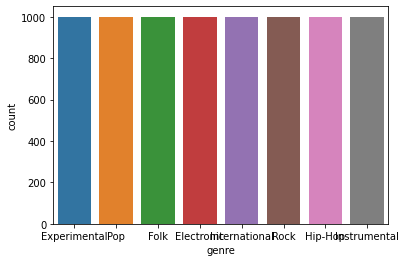

In [17]:
sns.countplot(x = 'genre', data = data)

Partition data

In [18]:
data.count()

track_id        7997
genre           7997
title           7997
chroma_cens1    7997
chroma_cens2    7997
                ... 
tonnetz3        7997
tonnetz4        7997
tonnetz5        7997
tonnetz6        7997
zcr1            7997
Length: 77, dtype: int64

In [25]:
data_new = data.drop(columns=['genre','title', 'track_id'])

In [26]:
#classification data splitting 
X_train,X_test, Y_train, Y_test = train_test_split(data_new.iloc[:,:], data['genre'], test_size = 0.2, random_state=1)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 1)

In [27]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5117 entries, 1637 to 95
Data columns (total 74 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   chroma_cens1         5117 non-null   float64
 1   chroma_cens2         5117 non-null   float64
 2   chroma_cens3         5117 non-null   float64
 3   chroma_cens4         5117 non-null   float64
 4   chroma_cens5         5117 non-null   float64
 5   chroma_cens6         5117 non-null   float64
 6   chroma_cens7         5117 non-null   float64
 7   chroma_cens8         5117 non-null   float64
 8   chroma_cens9         5117 non-null   float64
 9   chroma_cens10        5117 non-null   float64
 10  chroma_cens11        5117 non-null   float64
 11  chroma_cens12        5117 non-null   float64
 12  chroma_cqt1          5117 non-null   float64
 13  chroma_cqt2          5117 non-null   float64
 14  chroma_cqt3          5117 non-null   float64
 15  chroma_cqt4          5117 non-null   

In [28]:
print(X_val.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1280 entries, 6211 to 6866
Data columns (total 74 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   chroma_cens1         1280 non-null   float64
 1   chroma_cens2         1280 non-null   float64
 2   chroma_cens3         1280 non-null   float64
 3   chroma_cens4         1280 non-null   float64
 4   chroma_cens5         1280 non-null   float64
 5   chroma_cens6         1280 non-null   float64
 6   chroma_cens7         1280 non-null   float64
 7   chroma_cens8         1280 non-null   float64
 8   chroma_cens9         1280 non-null   float64
 9   chroma_cens10        1280 non-null   float64
 10  chroma_cens11        1280 non-null   float64
 11  chroma_cens12        1280 non-null   float64
 12  chroma_cqt1          1280 non-null   float64
 13  chroma_cqt2          1280 non-null   float64
 14  chroma_cqt3          1280 non-null   float64
 15  chroma_cqt4          1280 non-null 

In [29]:
# Explore test set
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 4739 to 6011
Data columns (total 74 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   chroma_cens1         1600 non-null   float64
 1   chroma_cens2         1600 non-null   float64
 2   chroma_cens3         1600 non-null   float64
 3   chroma_cens4         1600 non-null   float64
 4   chroma_cens5         1600 non-null   float64
 5   chroma_cens6         1600 non-null   float64
 6   chroma_cens7         1600 non-null   float64
 7   chroma_cens8         1600 non-null   float64
 8   chroma_cens9         1600 non-null   float64
 9   chroma_cens10        1600 non-null   float64
 10  chroma_cens11        1600 non-null   float64
 11  chroma_cens12        1600 non-null   float64
 12  chroma_cqt1          1600 non-null   float64
 13  chroma_cqt2          1600 non-null   float64
 14  chroma_cqt3          1600 non-null   float64
 15  chroma_cqt4          1600 non-null 

**Standardize the data**

In [31]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [47]:
# SelectKBest(f_classif, k=20).fit_transform(X_train, Y_train)
f_classif(X_train, Y_train)
np.mean(f_classif(X_train, Y_train)[0])

73.88624449646424